## TASK 1.1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

Perform exploratory data analysis to get an understanding of the datasets. Show visualizations and statistics for all attributes of both datasets for which that makes sense. It does not make sense, e.g., for textual attributes such as the description. For some attributes, e.g. longitude and latitude, it may make sense to visualize the combination of two attributes. Finally, for every attribute print the number of missing values.

In [2]:
# READING IN DATA
test = pd.read_csv("../data/cases_test.csv")
train = pd.read_csv("../data/cases_train.csv")
locations = pd.read_csv("../data/location.csv")

cases test attributes =  age,sex,province,country,latitude,longitude,date confirmation,additional information,source,outcome  
cases train attributes =  age,sex,province,country,latitude,longitude,date confirmation,additional information,source,outcome  
locations attributes = Province State,Country Region,Last Update,Lat,Long,Confirmed,Deaths,Recovered,Active,Combined Key,Incidence Rate,Case Fatality Ratio  


In [3]:
# Number of missing values
print("Number of missing values in test data:")
print(test.isnull().sum())
print("Number of missing values in training data:")
print(train.isnull().sum())
print("Number of missing values in location data:")
print(locations.isnull().sum())


Number of missing values in test data:
age                       25516
sex                       25199
province                    573
country                       0
latitude                      0
longitude                     0
date_confirmation            49
additional_information    43490
source                    16903
outcome                   46500
dtype: int64
Number of missing values in training data:
age                       209265
sex                       207084
province                    4106
country                       18
latitude                       2
longitude                      2
date_confirmation            288
additional_information    344912
source                    128478
outcome                        0
dtype: int64
Number of missing values in location data:
Province_State         168
Country_Region           0
Last_Update              0
Lat                     80
Long_                   80
Confirmed                0
Deaths                   0
Recovered 

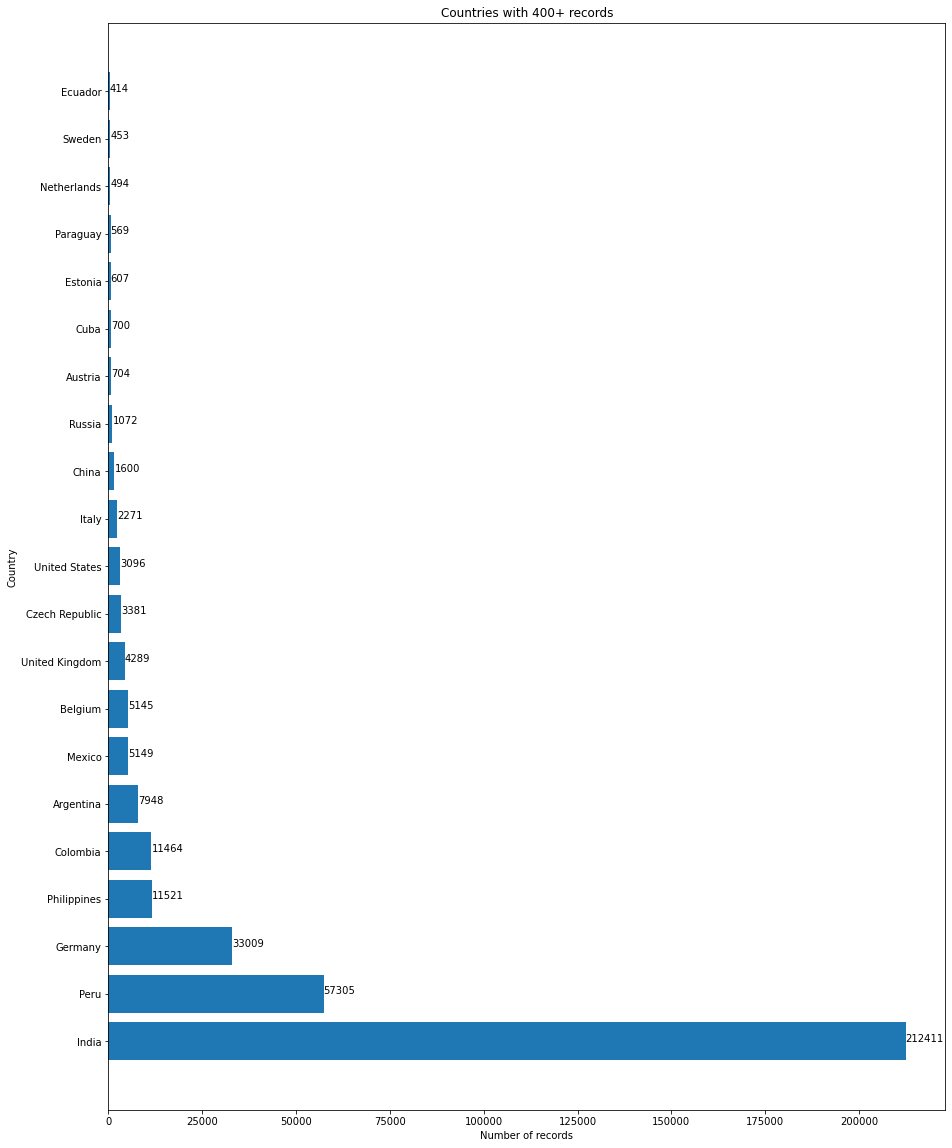

In [85]:
country = train['country'].value_counts()
country_more = country[country > 400]
country_less = country[country <= 400]
xlocs_more = [i for i in country_more.index]
ylocs_more = [i for i in country_more]
plt.figure(figsize=(15,20))
plt.xlabel("Number of records")
plt.ylabel("Country")
plt.title("Countries with 400+ records")
plt.barh(xlocs_more, ylocs_more)
for index, value in enumerate(ylocs_more):
    plt.text(value, index, str(value))

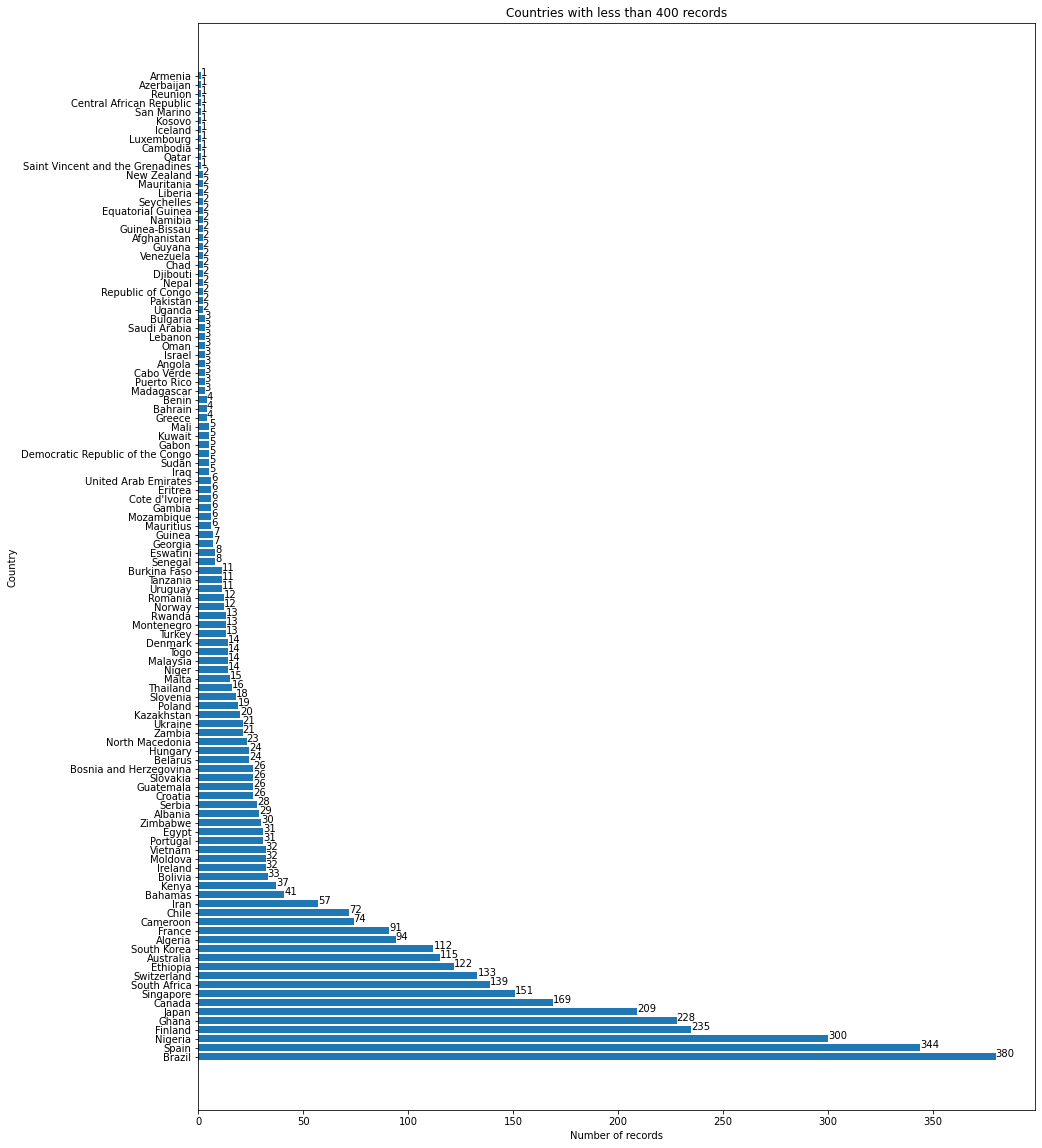

In [86]:
xlocs_less = [i for i in country_less.index]
ylocs_less = [i for i in country_less]
plt.figure(figsize=(15,20))
plt.xlabel("Number of records")
plt.ylabel("Country")
plt.title("Countries with less than 400 records")
plt.barh(xlocs_less, ylocs_less)
for index, value in enumerate(ylocs_less):
    plt.text(value, index, str(value))

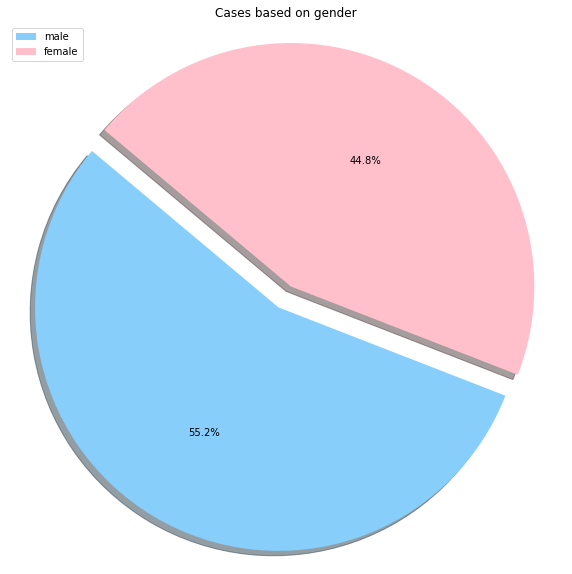

In [93]:
gender = train['sex']
gender = gender.value_counts()
xlocs = [i for i in gender.index]
ylocs = [i for i in gender]
plt.figure(figsize=(10,10))
plt.title("Cases based on gender")
colors = ['lightskyblue', 'pink']
explode = (0.1, 0)
plt.pie(ylocs, explode=explode, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(xlocs)
plt.axis('equal')
plt.show()

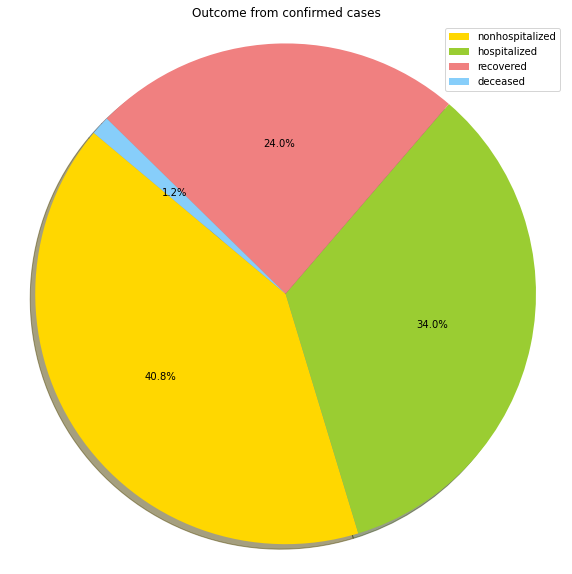

In [92]:
outcome = train['outcome']
outcome = outcome.value_counts()
xlocs = [i for i in outcome.index]
ylocs = [i for i in outcome]
plt.figure(figsize=(10,10))
plt.title('Outcome from confirmed cases')
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0, 0, 0, 0)
plt.pie(ylocs, explode=explode, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(xlocs)
plt.axis('equal')
plt.show()

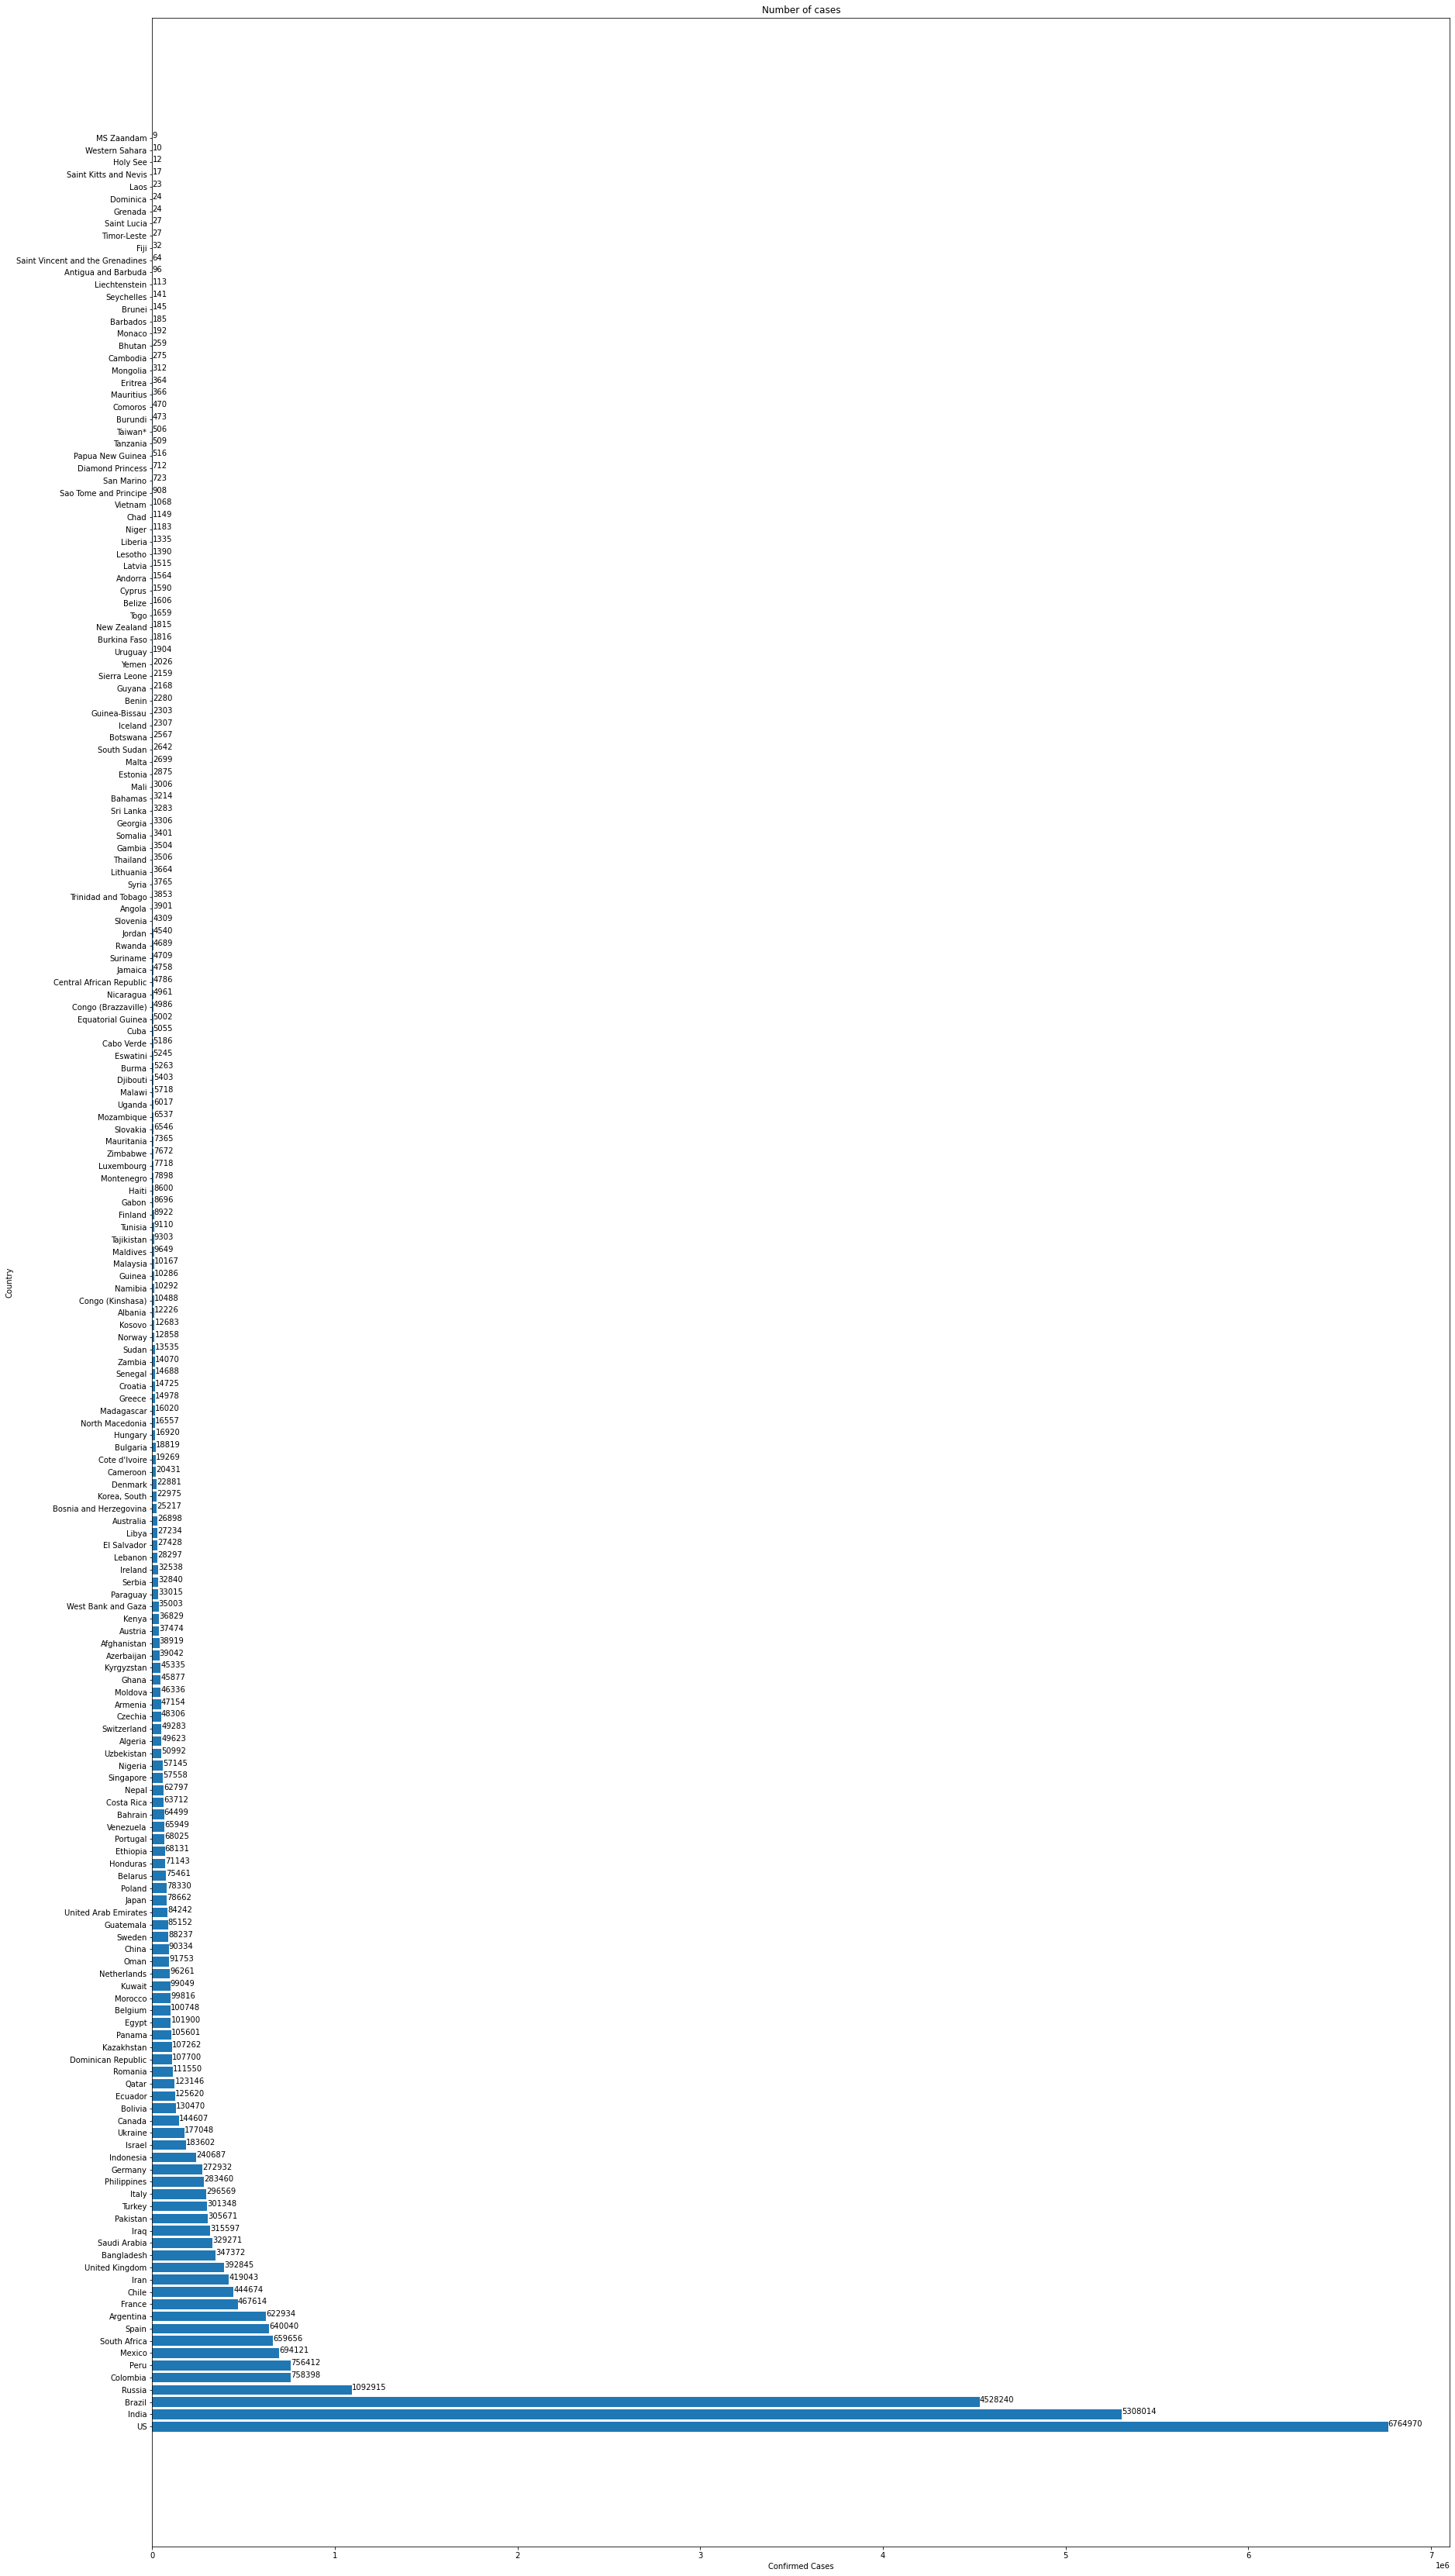

In [97]:
confirmed = locations.groupby(['Country_Region']).sum()['Confirmed'].sort_values(ascending=False)
xlocs = [i for i in confirmed.index]
ylocs = [i for i in confirmed]
plt.figure(figsize=(30,60))
plt.barh(xlocs, ylocs)
plt.xlabel("Confirmed Cases")
plt.ylabel("Country")
plt.title("Number of cases")
for index, value in enumerate(ylocs):
    plt.text(value, index, str(value))

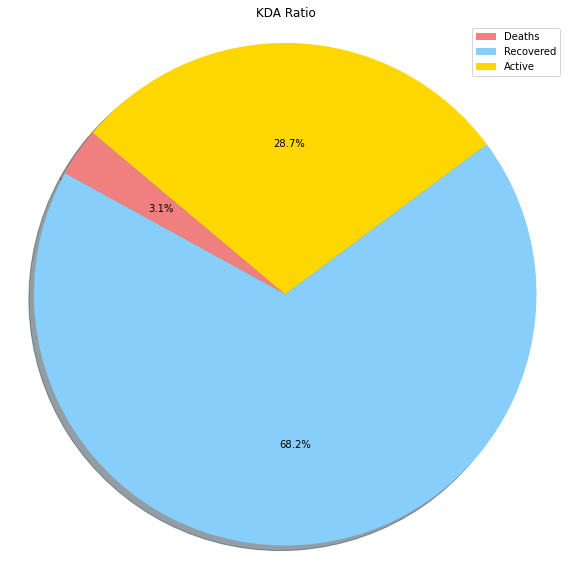

In [95]:
cases = locations.sum()[['Deaths', 'Recovered', 'Active']]
xlocs = [i for i in cases.index]
ylocs = [i for i in cases]
plt.figure(figsize=(10,10))
colors = ['lightcoral', 'lightskyblue', 'gold']
explode = (0, 0, 0)
plt.pie(ylocs, explode=explode, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(xlocs)
plt.title('KDA Ratio')
plt.axis('equal')
plt.show()

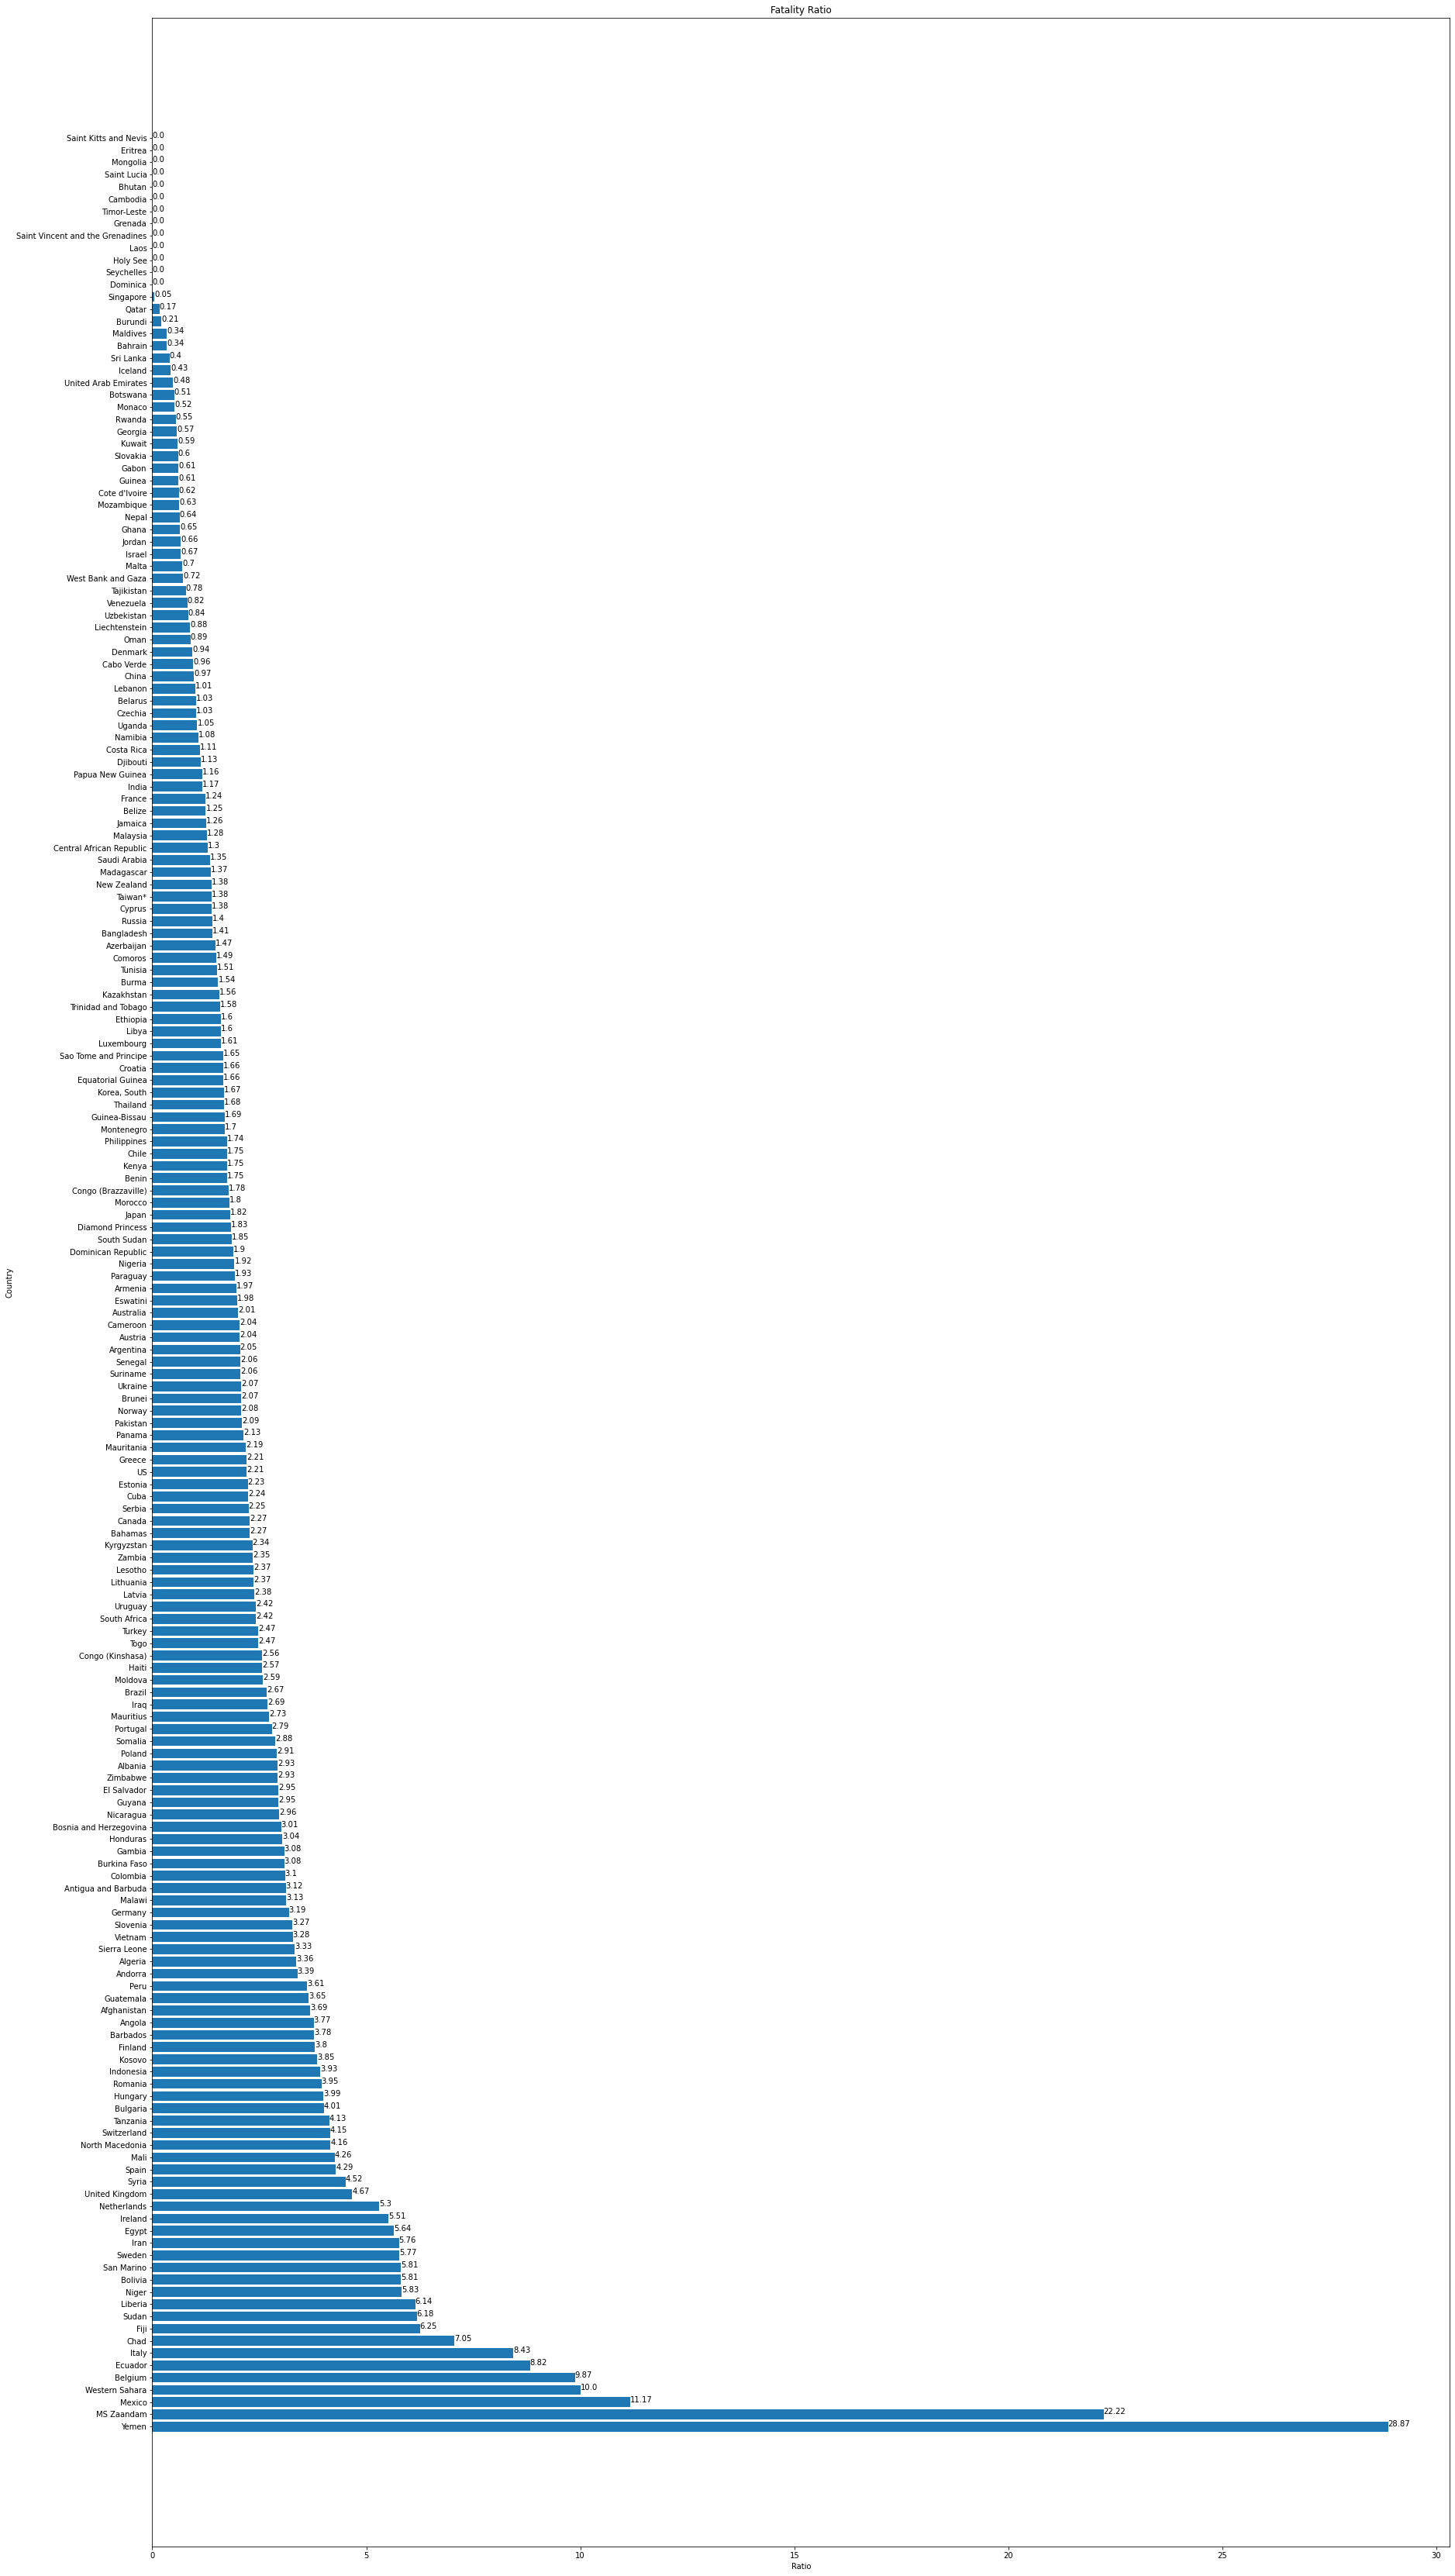

In [99]:
fatality_ratio = round(locations.groupby(['Country_Region']).mean()['Case-Fatality_Ratio'].sort_values(ascending=False),2)
xlocs = [i for i in fatality_ratio.index]
ylocs = [i for i in fatality_ratio]
plt.figure(figsize=(30,60))
plt.barh(xlocs, ylocs)
plt.xlabel("Ratio")
plt.ylabel("Country")
plt.title("Fatality Ratio")
for index, value in enumerate(ylocs):
    plt.text(value, index, str(value))